In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # to display image in s specific colormap
import pandas as pd
import random

from scipy.io import loadmat
from scipy.special import expit # sigmoid function
from PIL import Image # to show matirx as image

In [10]:
# multi classfication

mat = loadmat('ex3data1.mat')

X, Y = mat['X'], mat['y']
print (X.shape)

X = np.insert(X, 0, 1, axis=1)

(5000, 400)


In [21]:
# visualize data
def getSmallPic(row):
    width, height = 20, 20
    square = row[1:].reshape(width, height)
    return square.T

def displayData(indices_to_display=None):
    """
    随机选取10行X，创建20x20 image
    然后将所有的small img合成一个10x10 grid的big pic
    """
    width, height = 20, 20
    g_rows, g_cols = 10, 10
    
    if not indices_to_display:
        # 根据索引indice，从X中任意选取g_rows*g_cols个元素
        indices_to_display = random.sample(range(X.shape[0]), g_rows*g_cols)
        
    big_pic = np.zeros((height*g_rows, width*g_cols))
    
    irow, icol = 0, 0

    for idx in indices_to_display: # 索引
        if icol == g_cols:
            # 换行row+1, col=0
            irow += 1
            icol = 0
            
#         print (X[idx])
        small_pic = getSmallPic(X[idx])
        #              行【min：max】
        big_pic[irow*height:irow*height+small_pic.shape[0], icol*width:icol*width+small_pic.shape[1]] = small_pic
            
        icol += 1

    fig = plt.figure(figsize=(16,9))
    img = Image.fromarray(big_pic)
    plt.imshow(img, cmap=cm.Greys_r)
    

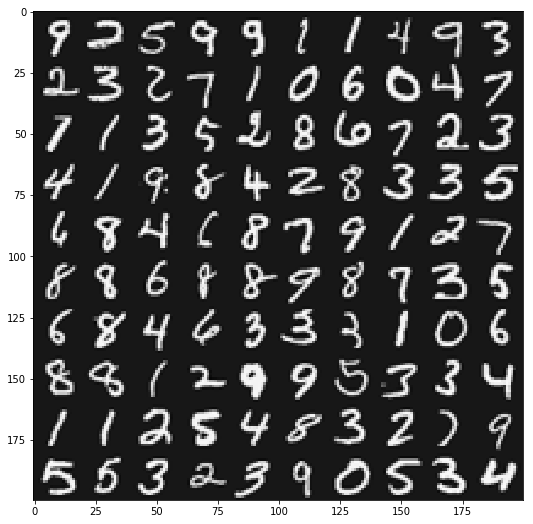

In [22]:
displayData(None)

In [66]:
# vectorizing the cost function

# global variables
m = X.shape[0] # samples

# hypothesis of sigmoid function
def h(theta, X):
    return expit(np.dot(X, theta))

# cost function (simple version)
def computeCost(theta, X, Y, Lambda=0.):
    
    hypo = h(theta, X)

    term1 = np.dot(np.log(hypo), -Y.T)
    term2 = np.dot(np.log(1-hypo), 1-Y.T)
    
    orig_term = (term1 - term2) / m
    reg_term = np.dot(theta.T, theta) / Lambda / (2*m)
    
    # 不带sum的cost function
    return orig_term + reg_term


In [71]:
# one-vs-all classification

def costGradient(theta, X, Y, Lambda=0.):
    
#     print (h(theta, Y).shape, Y.shape)
    beta = h(theta, X)-Y.T
    
    reg_term = Lambda / m * theta[1:] # j=[1 - n]
    
    grad = (1/m) * np.dot(X.T, beta) # original cost function term
    
    grad[1:] = grad[1:] + reg_term
    return grad
    

In [72]:
from scipy import optimize

def optimizeTheta(mytheta, myX, myY, myLambda=0.):
    result = optimize.fmin_cg(computeCost, fprime=costGradient, x0=mytheta, \
                              args=(myX, myY, myLambda), maxiter=50, disp=False, \
                              full_output=True)
    return result[0], result[1]

# def optimizeThetaWithMini()


In [75]:
def buildTheta(Lambda = 0.):
    initial_theta = np.zeros((X.shape[1], 1)).reshape(-1)
    # 存储最终结果的theta
    Theta = np.zeros((10, X.shape[1]))
    
    for i in range(10):
        # class "10" coresponds to handwritten zero
        i_class = i if i else 10
        logic_y = np.array([1 if x == i_class else 0 for x in Y])
        
#         print (initial_theta.shape, X.shape, logic_y.shape)
        
        i_Theta, i_mincost = optimizeTheta(initial_theta, X, logic_y, Lambda)
#         print (i_mincost)
        
        Theta[i,:] = i_Theta
    return Theta

In [76]:
# 全局最优的ø
final_theta = buildTheta()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf
nan


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf
nan


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:155: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)


inf


In [77]:
print (final_theta)

[[-7.95296954e+00  0.00000000e+00  0.00000000e+00 ... -3.57844252e-04
   9.65023761e-06  0.00000000e+00]
 [-2.97877417e+00  0.00000000e+00  0.00000000e+00 ...  4.30914349e-03
   1.07832907e-06  0.00000000e+00]
 [-3.88262253e+00  0.00000000e+00  0.00000000e+00 ...  5.39791646e-03
  -6.15369390e-04  0.00000000e+00]
 ...
 [-2.29262479e+00  0.00000000e+00  0.00000000e+00 ... -3.29672378e-04
   4.12133755e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.81482233e+00  0.00000000e+00  0.00000000e+00 ... -6.89563577e-04
   4.81076364e-05  0.00000000e+00]]


In [82]:
def predictOneVsAll(theta, row):

    classes = range(1,11) # 1-10
    hypots = [0] * len(classes)
    # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    for i in range(len(classes)):
        hypots[i] = h(theta[i], row)
        
    return classes[np.argmax(np.array(hypots))]
    

In [83]:
correct, total = 0, 0
incorrect_indices = []

for i_row in range(X.shape[0]):
    total += 1
    
    if predictOneVsAll(final_theta, X[i_row]) == Y[i_row]:
        correct += 1
    else:
        incorrect_indices.append(i_row)

print ('accuracy = %0.2f'%(100*(correct/total)))


accuracy = 0.56


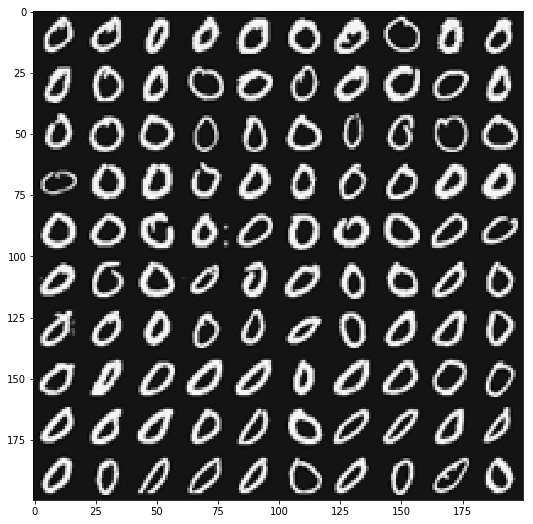

In [84]:
displayData(incorrect_indices[:100])

In [30]:
# a = random.sample(range(5000), 10*10)
# print (a, len(a))

b = np.array([[1,2], [3,4]])
c = np.array([[5,6], [7,8]])
print ('1:', b.T * c, '\n4:', c.T * b, '\n2:', np.dot(b, c), '\n3:', np.dot(b.T, c))

[1816, 470, 1288, 1801, 3202, 2508, 2923, 4474, 2113, 3643, 925, 3770, 3756, 910, 1013, 2880, 3505, 4606, 3551, 4304, 3302, 3670, 1561, 3753, 1732, 804, 2367, 1953, 2862, 320, 3195, 2745, 3425, 565, 2516, 3946, 693, 1401, 4670, 4840, 3418, 3201, 4005, 2355, 2703, 3919, 1828, 392, 835, 3947, 707, 2699, 2694, 4929, 490, 1356, 162, 2292, 3645, 1542, 3459, 1354, 1512, 4692, 85, 3166, 1514, 1909, 1227, 3078, 3661, 1885, 2222, 510, 3496, 2802, 2964, 378, 4054, 958, 1695, 1742, 2741, 4953, 4753, 4945, 4744, 209, 352, 4778, 345, 2646, 46, 731, 3704, 252, 3399, 1629, 4224, 1662] 100
1: [[ 5 18]
 [14 32]] 
4: [[ 5 14]
 [18 32]] 
2: [[19 22]
 [43 50]] 
3: [[26 30]
 [38 44]]


In [44]:
d = np.array([[1,2], [3,4], [5,6]])
print (d[1:])

e = np.array([[1,2], [3,4], [5,6]])
f = np.array([[5,6,7], [7,8,9]])
print (np.dot(e, f), '\n', np.dot(f, e)) # 可以看到是后面一个*前面一个
print (f.dot(e)) # np.dot(f, e)

print (e.reshape(-1), e.ravel())


[[3 4]
 [5 6]]
[[19 22 25]
 [43 50 57]
 [67 78 89]] 
 [[ 58  76]
 [ 76 100]]
[[ 58  76]
 [ 76 100]]
[1 2 3 4 5 6] [1 2 3 4 5 6]


In [78]:
classes = range(1,11) # 1-10
hypots = [0] * len(classes)
print (hypots)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
